### This dataset is the results of a chemical analysis of wines grown in the sme region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

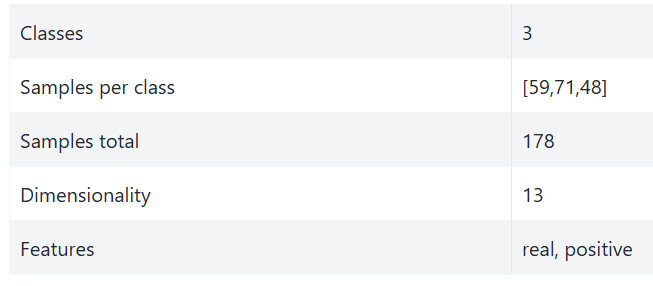

In [2]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
wine = load_wine()
x = np.array(wine.data)
y = np.array(wine.target)

In [4]:
print(x[1:5,:])

[[1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [5]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


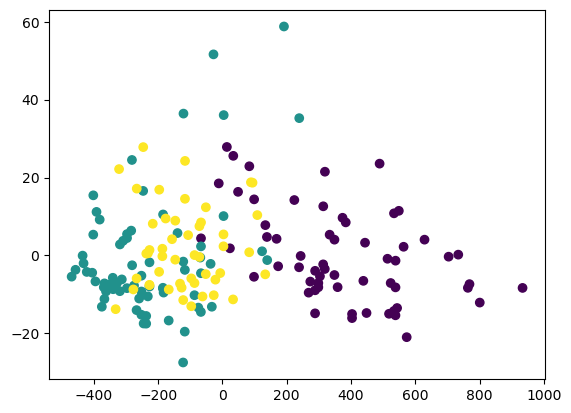

In [7]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit(x)
z = result.transform(x)
plt.scatter(z[:,0],z[:,1], c = y)
plt.show()

## The data is not linearly seperable in reduced dimension

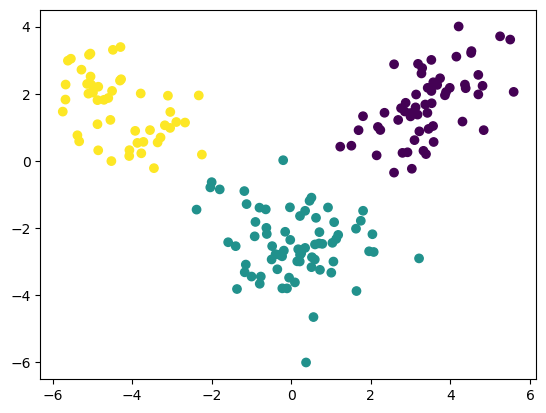

In [9]:
## LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(x,y)
plt.scatter(X_lda[:,0], X_lda[:,1], c = y)
plt.show()

## Testing model

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.3)
lda1 = LinearDiscriminantAnalysis(n_components=2)

In [15]:
lda.fit(xtrain, ytrain)

LinearDiscriminantAnalysis()

In [16]:
yn = lda.predict(xtest)

In [17]:
print(ytest)
print(yn)
print(ytest-yn)

[0 1 0 1 1 2 1 1 2 2 0 2 0 1 0 2 1 1 2 0 2 1 1 2 1 1 1 1 0 0 1 0 2 0 2 2 0
 2 2 1 1 0 1 1 1 1 2 1 0 0 0 2 0 1]
[0 1 0 1 1 2 1 1 2 2 0 2 0 1 0 2 1 1 2 0 2 1 1 2 1 1 1 1 0 0 1 0 2 0 2 2 0
 2 2 1 1 0 1 1 1 1 2 1 0 0 0 2 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## There is no misclassification in the data